In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['POS_CASH_balance.csv', 'bureau_balance.csv', 'application_train.csv', 'previous_application.csv', 'installments_payments.csv', 'credit_card_balance.csv', 'sample_submission.csv', 'application_test.csv', 'bureau.csv']


In [2]:
app_train = pd.read_csv("../input/application_train.csv")
app_test = pd.read_csv("../input/application_test.csv")
cc_balance = pd.read_csv("../input/credit_card_balance.csv")
prev_applications= pd.read_csv("../input/previous_application.csv")
install_payments = pd.read_csv("../input/installments_payments.csv")
pos_cash= pd.read_csv("../input/POS_CASH_balance.csv")
bureau = pd.read_csv("../input/bureau.csv")
bureau_bal = pd.read_csv("../input/bureau_balance.csv")
sample_sub = pd.read_csv("../input/sample_submission.csv")

In [3]:
total = app_train.isnull().sum().sort_values(ascending = False)
missing = app_train.isnull().count().sort_values(ascending= False)
percentage = (total/missing*100 ).sort_values(ascending = False)
missing_app_train_data= pd.concat([total,percentage],axis=1, keys=['Total','Percent'])
missing_app_train_data.head()

,Total,Percent
AMT_ANNUITY,12,0.003902
AMT_CREDIT,0,0.000000
AMT_GOODS_PRICE,278,0.090403
AMT_INCOME_TOTAL,0,0.000000
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631


In [4]:
total = pos_cash.isnull().sum().sort_values(ascending = False)
percent = (pos_cash.isnull().sum()/pos_cash.isnull().count()*100).sort_values(ascending = False)
missing_pos_cash  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_pos_cash.head()

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_DPD_DEF,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000


In [5]:
total = bureau_bal.isnull().sum().sort_values(ascending = False)
percent = (bureau_bal.isnull().sum()/bureau_bal.isnull().count()*100).sort_values(ascending = False)
missing_bureau_bal = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_bal.head()

,Total,Percent
STATUS,0,0.0
MONTHS_BALANCE,0,0.0
SK_ID_BUREAU,0,0.0


In [6]:
total = prev_applications.isnull().sum().sort_values(ascending = False)
percent = (prev_applications.isnull().sum()/prev_applications.isnull().count()*100).sort_values(ascending = False)
missing_prev_applications  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_prev_applications.head()

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754


In [7]:
total = install_payments.isnull().sum().sort_values(ascending = False)
percent = (install_payments.isnull().sum()/install_payments.isnull().count()*100).sort_values(ascending = False)
missing_install_payments  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_install_payments.head()

,Total,Percent
AMT_PAYMENT,2905,0.021352
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_INSTALMENT,0,0.000000
DAYS_INSTALMENT,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000


In [8]:
total = cc_balance.isnull().sum().sort_values(ascending = False)
percent = (cc_balance.isnull().sum()/cc_balance.isnull().count()*100).sort_values(ascending = False)
missing_cc_balance  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_cc_balance.head(10)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_DPD_DEF,0,0.000000


In [9]:
app_train.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
app_test.head(20)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [11]:
app_train_obj = app_train.select_dtypes(include=['object']).copy()
app_train_obj.head(40)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN,NaN,NaN
8,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN,NaN
9,Revolving loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity,NaN,NaN,NaN,NaN


In [12]:
app_train_obj.columns.values

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [15]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [16]:
train_labels = app_train["TARGET"]

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train["TARGET"] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [17]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

In [18]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


In [19]:
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,0,0,0,0,1,0,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0


In [20]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,0,0,0,0,0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,0,0,0,1,0,0,1,0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,0,0,0,0,0


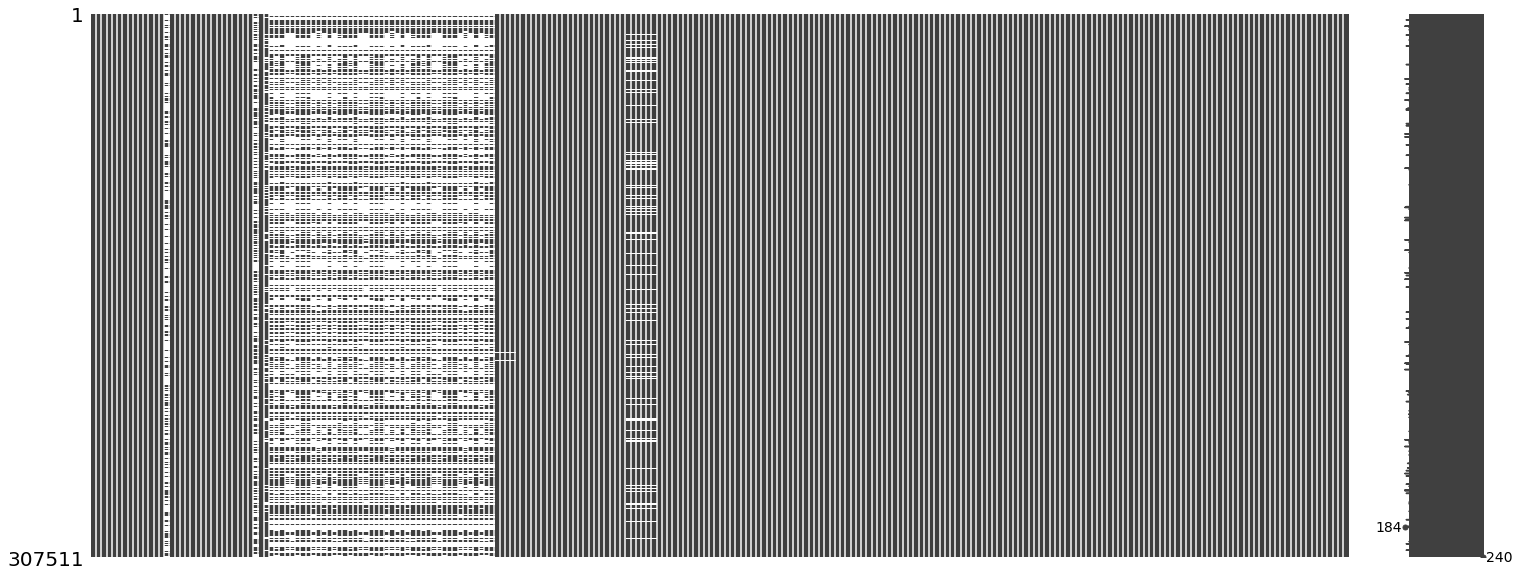

In [21]:
import missingno as msno
msno.matrix(app_train)
from sklearn.preprocessing import Imputer

In [22]:
imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)

In [23]:
app_train.isnull().sum()

SK_ID_CURR                                       0
NAME_CONTRACT_TYPE                               0
FLAG_OWN_CAR                                     0
FLAG_OWN_REALTY                                  0
CNT_CHILDREN                                     0
AMT_INCOME_TOTAL                                 0
AMT_CREDIT                                       0
AMT_ANNUITY                                     12
AMT_GOODS_PRICE                                278
REGION_POPULATION_RELATIVE                       0
DAYS_BIRTH                                       0
DAYS_EMPLOYED                                    0
DAYS_REGISTRATION                                0
DAYS_ID_PUBLISH                                  0
OWN_CAR_AGE                                 202929
FLAG_MOBIL                                       0
FLAG_EMP_PHONE                                   0
FLAG_WORK_PHONE                                  0
FLAG_CONT_MOBILE                                 0
FLAG_PHONE                     

In [24]:
app_train[['AMT_ANNUITY']] = imputer.fit_transform(app_train[['AMT_ANNUITY']])
app_train[['AMT_GOODS_PRICE']] = imputer.fit_transform(app_train[['AMT_GOODS_PRICE']])
app_train[['DAYS_LAST_PHONE_CHANGE']] = imputer.fit_transform(app_train[['DAYS_LAST_PHONE_CHANGE']])
app_train[['OWN_CAR_AGE']] = imputer.fit_transform(app_train[['OWN_CAR_AGE']])
app_train[['CNT_FAM_MEMBERS']]= imputer.fit_transform(app_train[['CNT_FAM_MEMBERS']])
app_test[['AMT_ANNUITY']] = imputer.fit_transform(app_test[['AMT_ANNUITY']])
app_test[['AMT_GOODS_PRICE']] = imputer.fit_transform(app_test[['AMT_GOODS_PRICE']])
app_test[['DAYS_LAST_PHONE_CHANGE']] = imputer.fit_transform(app_test[['DAYS_LAST_PHONE_CHANGE']])
app_test[['OWN_CAR_AGE']] = imputer.fit_transform(app_test[['OWN_CAR_AGE']])
app_test[['CNT_FAM_MEMBERS']]= imputer.fit_transform(app_test[['CNT_FAM_MEMBERS']])

In [25]:
app_test.isnull().sum()

SK_ID_CURR                                  0
NAME_CONTRACT_TYPE                          0
FLAG_OWN_CAR                                0
FLAG_OWN_REALTY                             0
CNT_CHILDREN                                0
AMT_INCOME_TOTAL                            0
AMT_CREDIT                                  0
AMT_ANNUITY                                 0
AMT_GOODS_PRICE                             0
REGION_POPULATION_RELATIVE                  0
DAYS_BIRTH                                  0
DAYS_EMPLOYED                               0
DAYS_REGISTRATION                           0
DAYS_ID_PUBLISH                             0
OWN_CAR_AGE                                 0
FLAG_MOBIL                                  0
FLAG_EMP_PHONE                              0
FLAG_WORK_PHONE                             0
FLAG_CONT_MOBILE                            0
FLAG_PHONE                                  0
FLAG_EMAIL                                  0
CNT_FAM_MEMBERS                   

In [26]:
app_train.isnull().sum()

SK_ID_CURR                                  0
NAME_CONTRACT_TYPE                          0
FLAG_OWN_CAR                                0
FLAG_OWN_REALTY                             0
CNT_CHILDREN                                0
AMT_INCOME_TOTAL                            0
AMT_CREDIT                                  0
AMT_ANNUITY                                 0
AMT_GOODS_PRICE                             0
REGION_POPULATION_RELATIVE                  0
DAYS_BIRTH                                  0
DAYS_EMPLOYED                               0
DAYS_REGISTRATION                           0
DAYS_ID_PUBLISH                             0
OWN_CAR_AGE                                 0
FLAG_MOBIL                                  0
FLAG_EMP_PHONE                              0
FLAG_WORK_PHONE                             0
FLAG_CONT_MOBILE                            0
FLAG_PHONE                                  0
FLAG_EMAIL                                  0
CNT_FAM_MEMBERS                   

In [27]:
app_train.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,0,0,0,0,1,0,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0


In [28]:
app_test.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,0,0,0,0,0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,0,0,0,1,0,0,1,0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,0,0,0,0,0


In [29]:
app_train.fillna(value=0,inplace= True)
app_train.head(100)

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,0,1,0,202500.000,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,0,0,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,0,0,0,0,1,0,0
2,100004,1,1,1,0,67500.000,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.000,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.000,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,0,1,0,99000.000,490495.5,27517.5,454500.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,1,1,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
7,100010,0,1,1,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,0.018634,...,0,0,0,0,0,0,0,0,0,0
9,100012,1,0,1,0,135000.000,405000.0,20250.0,405000.0,0.019689,...,0,0,0,0,0,0,0,0,0,0


In [30]:
app_test.fillna(value=0,inplace=True)
app_test.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,0,0,0,0,0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,0,0,0,1,0,0,1,0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,0,0,0,0,0


In [31]:
app_train.isnull().any()

SK_ID_CURR                                  False
NAME_CONTRACT_TYPE                          False
FLAG_OWN_CAR                                False
FLAG_OWN_REALTY                             False
CNT_CHILDREN                                False
AMT_INCOME_TOTAL                            False
AMT_CREDIT                                  False
AMT_ANNUITY                                 False
AMT_GOODS_PRICE                             False
REGION_POPULATION_RELATIVE                  False
DAYS_BIRTH                                  False
DAYS_EMPLOYED                               False
DAYS_REGISTRATION                           False
DAYS_ID_PUBLISH                             False
OWN_CAR_AGE                                 False
FLAG_MOBIL                                  False
FLAG_EMP_PHONE                              False
FLAG_WORK_PHONE                             False
FLAG_CONT_MOBILE                            False
FLAG_PHONE                                  False


In [32]:
app_test.isnull().any()

SK_ID_CURR                                  False
NAME_CONTRACT_TYPE                          False
FLAG_OWN_CAR                                False
FLAG_OWN_REALTY                             False
CNT_CHILDREN                                False
AMT_INCOME_TOTAL                            False
AMT_CREDIT                                  False
AMT_ANNUITY                                 False
AMT_GOODS_PRICE                             False
REGION_POPULATION_RELATIVE                  False
DAYS_BIRTH                                  False
DAYS_EMPLOYED                               False
DAYS_REGISTRATION                           False
DAYS_ID_PUBLISH                             False
OWN_CAR_AGE                                 False
FLAG_MOBIL                                  False
FLAG_EMP_PHONE                              False
FLAG_WORK_PHONE                             False
FLAG_CONT_MOBILE                            False
FLAG_PHONE                                  False


In [33]:
correlations = app_train.corr()['TARGET'].sort_values()

In [34]:
print('Most Positive Correlations: \n', correlations)


Most Positive Correlations: 
 EXT_SOURCE_2                                        -0.159030
EXT_SOURCE_3                                        -0.119572
DAYS_BIRTH                                          -0.078239
EXT_SOURCE_1                                        -0.064698
NAME_EDUCATION_TYPE_Higher education                -0.056593
CODE_GENDER_F                                       -0.054704
FLOORSMAX_AVG                                       -0.049839
FLOORSMAX_MEDI                                      -0.049720
FLOORSMAX_MODE                                      -0.049458
NAME_INCOME_TYPE_Pensioner                          -0.046209
ORGANIZATION_TYPE_XNA                               -0.045987
DAYS_EMPLOYED                                       -0.044932
EMERGENCYSTATE_MODE_No                              -0.042201
TOTALAREA_MODE                                      -0.041037
YEARS_BEGINEXPLUATATION_MEDI                        -0.040983
YEARS_BEGINEXPLUATATION_AVG             

In [35]:
x = app_train.iloc[:,:-1].values

In [36]:
y = app_train.iloc[:,-1].values

In [40]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0)
classifier.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,0,0,0,0,0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,0,0,0,1,0,0,1,0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,0,0,0,0,0


In [43]:
y_pred = classifier.predict(app_test)

In [44]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [49]:
from pandas import Series,DataFrame

In [51]:
app_test.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,0,0,0,0,0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,0,0,0,1,0,0,1,0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,0,0,0,0,0


In [52]:
my_submission = pd.DataFrame({'SK_ID_CURR':app_test.SK_ID_CURR, 'TARGET':y_pred})

In [53]:
my_submission.head(5)

,SK_ID_CURR,TARGET
0,100001,1
1,100005,1
2,100013,1
3,100028,0
4,100038,0


In [54]:
my_submission.to_csv('submission.csv', index=False)